In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps

import pandas as pd
import scipy as sc
import seaborn as sns

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from qiskit.primitives import Sampler

from qiskit import *
from qiskit_machine_learning.kernels import * #QuantumKernel
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes, EfficientSU2, ZFeatureMap, PauliFeatureMap
from qiskit_algorithms.state_fidelities import ComputeUncompute

## Análise dos dados
Antes de executar os modelos de QML podemos fazer uma breve análise dos dados presentes no dataset (disponível em: https://archive.ics.uci.edu/dataset/372/htru2)

observação: como no arquivo .csv não constavam os títulos de cada classe, tal arquivo foi editado adicionando uma linha de descrição dos dados, obtida através do site e dos metadados do arquivo .arff

In [3]:
# importação dos dados
df = pd.read_csv('HTRU_2.csv')
# informações base sobre o dataset
print(f'Tamanho do dataset: {df.shape}')
print(f'Número de features: {df.shape[1]}')
data, meta = sc.io.arff.loadarff('HTRU_2.arff')
print(f'Categorias do dataset:{meta.names()}')
print('Primeiras linhas:')
df.head()

Tamanho do dataset: (17898, 9)
Número de features: 9
Categorias do dataset:['Profile_mean', 'Profile_stdev', 'Profile_skewness', 'Profile_kurtosis', 'DM_mean', 'DM_stdev', 'DM_skewness', 'DM_kurtosis', 'class']
Primeiras linhas:


,Profile_mean,Profile_stdev,Profile_skewness,Profile_kurtosis,DM_mean,DM_stdev,DM_skewness,DM_kurtosis,class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [4]:
df = df.iloc[:500]

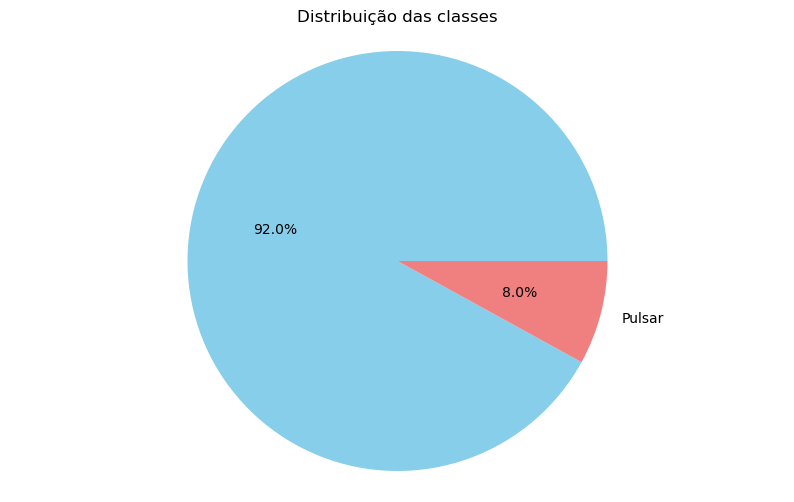

In [5]:
# distribuição das classes
class_distribution = df['class'].value_counts()
plt.figure(figsize =(10,6))
plt.pie(class_distribution, labels=['', 'Pulsar'] ,autopct='%1.1f%%', colors=['skyblue',  'lightcoral'])

plt.title("Distribuição das classes")
plt.axis("equal")
plt.show()

## Máquina de vetor de suporte clássica
A máquina de vetor de suporte ou *Support Vector Machine* é um modelo de aprendizado de máquina utilizado em problemas de classificação. O comportamento deste modelo se resume em calcular um hiperplano que divide os dados em dois lados. Os dois pontos mais próximos entre os dois lados diferente são chamados **vetor de suporte**. Muitas vezes a divisão com um hiperplano não pode ser feita diretamente, é então aplicada uma função de mapeamento, *feature map*, que manipula o espaço dos dados para uma dimensão maior.

> Etapa 1: Preprocessamento ------------------------

> Etapa 2: Separação dos dados ---------------------
X Treinamento: (300, 8)
y Treinamento: 300
X Teste:  (200, 8)
y Teste:  200

> Etapa 3: Normalização ----------------------------
APLICANDO A MÚLTIPLOS KERNELS

 Para SVM com kernel linear

> Etapa 4: Criando e treinando o modelo ------------

> Etapa 5: Testando o modelo -----------------------
Desempenho geral: 
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       170
           1       0.76      0.53      0.63        30

    accuracy                           0.91       200
   macro avg       0.84      0.75      0.79       200
weighted avg       0.90      0.91      0.90       200

Matriz de confusão:


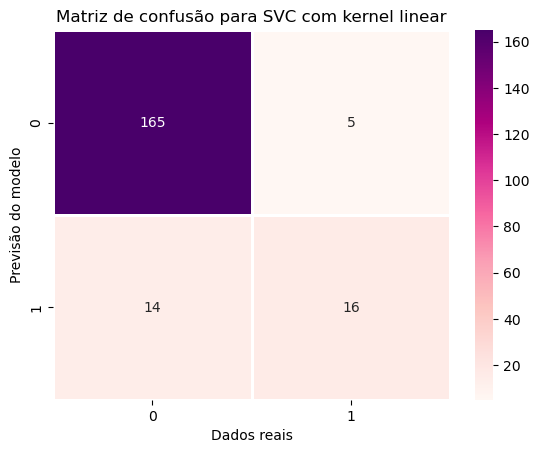


 Para SVM com kernel poly

> Etapa 4: Criando e treinando o modelo ------------

> Etapa 5: Testando o modelo -----------------------
Desempenho geral: 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       180
           1       0.62      0.65      0.63        20

    accuracy                           0.93       200
   macro avg       0.79      0.80      0.80       200
weighted avg       0.93      0.93      0.93       200

Matriz de confusão:


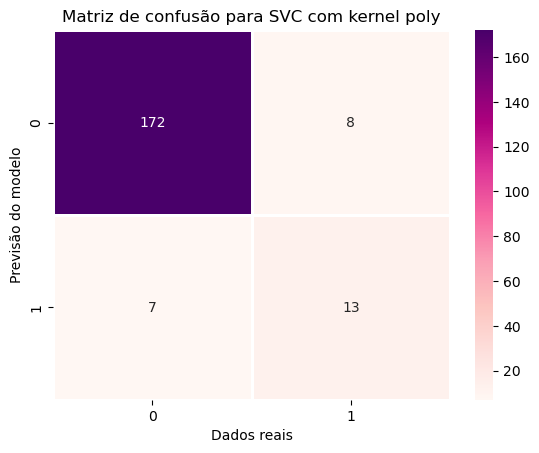


 Para SVM com kernel rbf

> Etapa 4: Criando e treinando o modelo ------------

> Etapa 5: Testando o modelo -----------------------
Desempenho geral: 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       173
           1       0.71      0.56      0.62        27

    accuracy                           0.91       200
   macro avg       0.82      0.76      0.79       200
weighted avg       0.90      0.91      0.91       200

Matriz de confusão:


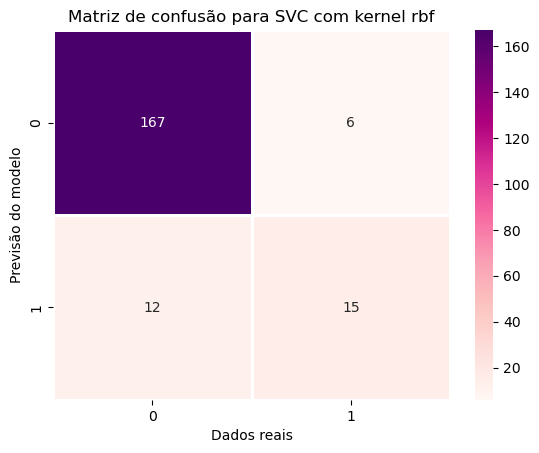


 Para SVM com kernel sigmoid

> Etapa 4: Criando e treinando o modelo ------------

> Etapa 5: Testando o modelo -----------------------
Desempenho geral: 
              precision    recall  f1-score   support

           0       0.74      0.99      0.85       134
           1       0.95      0.30      0.46        66

    accuracy                           0.77       200
   macro avg       0.85      0.65      0.65       200
weighted avg       0.81      0.77      0.72       200

Matriz de confusão:


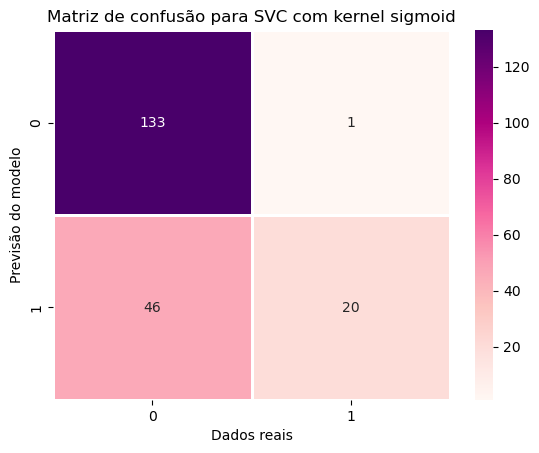

In [7]:
# Pré processamento
print('> Etapa 1: Preprocessamento ------------------------')
#df = df.iloc[:300] #ajuste de diminuição dos dados
X = df[['Profile_mean', 'Profile_stdev', 'Profile_skewness', 'Profile_kurtosis', 'DM_mean', 'DM_stdev', 'DM_skewness', 'DM_kurtosis']]
y = np.ravel(df['class'].values)
# Os dados já são valores numéricos então não há grandes modificações necessárias

# Separação dos dados
print('\n> Etapa 2: Separação dos dados ---------------------')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42) #treinamento = 15% dos dados
print(f"X Treinamento: {X_train.shape}")
print(f"y Treinamento: {len(y_train)}")
print(f"X Teste:  {X_test.shape}")
print(f"y Teste:  {len(y_test)}")

# Normalização dos dados
print('\n> Etapa 3: Normalização ----------------------------')
scaler_x = StandardScaler()
scaler_x.fit(X_train)
Xs_train = scaler_x.transform(X_train)
Xs_test  = scaler_x.transform(X_test)

print('APLICANDO A MÚLTIPLOS KERNELS')
# Aplicação da SVM
for krnel in ["linear", "poly","rbf", "sigmoid"]:
    print(f'\n Para SVM com kernel {krnel}')
    print('\n> Etapa 4: Criando e treinando o modelo ------------')
    SVM = SVC(kernel=krnel, class_weight='balanced')
    SVM.fit(Xs_train, y_train)

    # Testando o modelo
    print('\n> Etapa 5: Testando o modelo -----------------------')
    y_pred = SVM.predict(Xs_test)
    desempenho = classification_report(y_pred, y_test)
    print(f'Desempenho geral: \n{desempenho}')
    print(f'Matriz de confusão:')
    cf_matrix = confusion_matrix(y_pred, y_test)
    sns.heatmap(cf_matrix, cmap='RdPu', annot=True, linewidth=1, fmt='d')
    plt.xlabel("Dados reais")
    plt.title(f"Matriz de confusão para SVC com kernel {krnel}")
    plt.ylabel("Previsão do modelo")
    plt.show()

## Máquina de vetor de suporte quântica
A máquina de vetor de suporte quântica, ou QSVM do inglês *Quantum Support Vector Machine* tem comportamento análogo à sua versão clássica, a principal diferença entre as duas é que no modelo clássico o *feature map* utilizado leva os dados para um espaço quântico. Os *feature maps* utilizados aqui são baseados em propriedade angulares, de forma que os circuitos são formados majoritariamente por aplicação de portas quânticas de rotação.

> Etapa 1: Preprocessamento ------------------------

> Etapa 2: Separação dos dados ---------------------
X Treinamento: (300, 8)
y Treinamento: 300
X Teste:  (200, 8)
y Teste:  200

> Etapa 3: Normalização ----------------------------

 Para QSVM com ZZ Feature Map e emaranhamento linear

> Etapa 4: Criando e treinando o modelo ------------


C:\Users\Felipe\AppData\Local\Temp\ipykernel_16780\4069885238.py:41: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  fidelity = ComputeUncompute(sampler = Sampler())



> Etapa 5: Testando o modelo -----------------------
Desempenho geral: 
              precision    recall  f1-score   support

           0       1.00      0.90      0.95       199
           1       0.05      1.00      0.09         1

    accuracy                           0.90       200
   macro avg       0.52      0.95      0.52       200
weighted avg       1.00      0.90      0.94       200

Matriz de confusão:


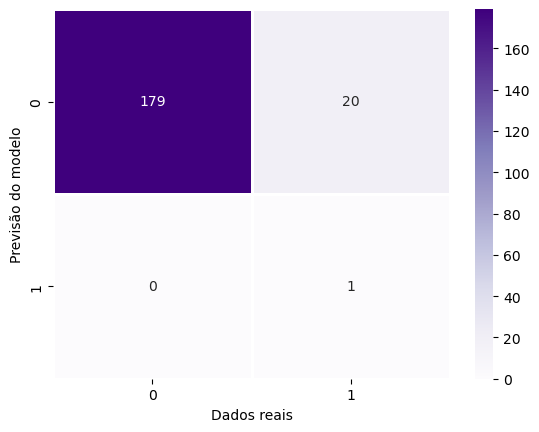


 Para QSVM com Pauli Feature Map e emaranhamento linear

> Etapa 4: Criando e treinando o modelo ------------


C:\Users\Felipe\AppData\Local\Temp\ipykernel_16780\4069885238.py:41: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  fidelity = ComputeUncompute(sampler = Sampler())



> Etapa 5: Testando o modelo -----------------------
Desempenho geral: 
              precision    recall  f1-score   support

           0       1.00      0.90      0.95       199
           1       0.05      1.00      0.09         1

    accuracy                           0.90       200
   macro avg       0.52      0.95      0.52       200
weighted avg       1.00      0.90      0.94       200

Matriz de confusão:


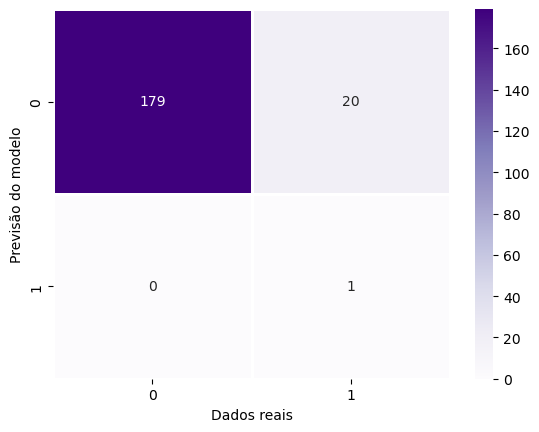


 Para QSVM com Z Feature Map e emaranhamento linear

> Etapa 4: Criando e treinando o modelo ------------


C:\Users\Felipe\AppData\Local\Temp\ipykernel_16780\4069885238.py:41: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  fidelity = ComputeUncompute(sampler = Sampler())



> Etapa 5: Testando o modelo -----------------------
Desempenho geral: 
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       182
           1       0.29      0.33      0.31        18

    accuracy                           0.86       200
   macro avg       0.61      0.63      0.62       200
weighted avg       0.87      0.86      0.87       200

Matriz de confusão:


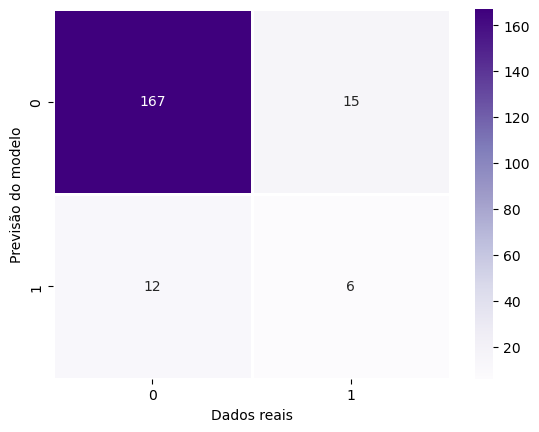


 Para QSVM com ZZ Feature Map e emaranhamento full

> Etapa 4: Criando e treinando o modelo ------------


C:\Users\Felipe\AppData\Local\Temp\ipykernel_16780\4069885238.py:41: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  fidelity = ComputeUncompute(sampler = Sampler())



> Etapa 5: Testando o modelo -----------------------
Desempenho geral: 
              precision    recall  f1-score   support

           0       1.00      0.90      0.94       200
           1       0.00      0.00      0.00         0

    accuracy                           0.90       200
   macro avg       0.50      0.45      0.47       200
weighted avg       1.00      0.90      0.94       200

Matriz de confusão:


C:\Users\Felipe\AppData\Roaming\Python\conda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Felipe\AppData\Roaming\Python\conda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Felipe\AppData\Roaming\Python\conda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


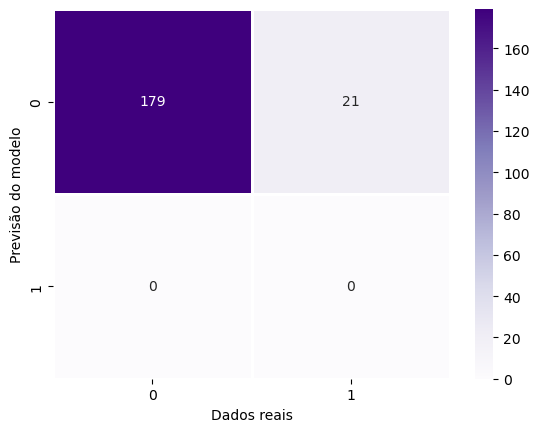

C:\Users\Felipe\AppData\Local\Temp\ipykernel_16780\4069885238.py:41: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  fidelity = ComputeUncompute(sampler = Sampler())



 Para QSVM com Pauli Feature Map e emaranhamento full

> Etapa 4: Criando e treinando o modelo ------------

> Etapa 5: Testando o modelo -----------------------
Desempenho geral: 
              precision    recall  f1-score   support

           0       1.00      0.90      0.94       200
           1       0.00      0.00      0.00         0

    accuracy                           0.90       200
   macro avg       0.50      0.45      0.47       200
weighted avg       1.00      0.90      0.94       200

Matriz de confusão:


C:\Users\Felipe\AppData\Roaming\Python\conda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Felipe\AppData\Roaming\Python\conda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Felipe\AppData\Roaming\Python\conda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


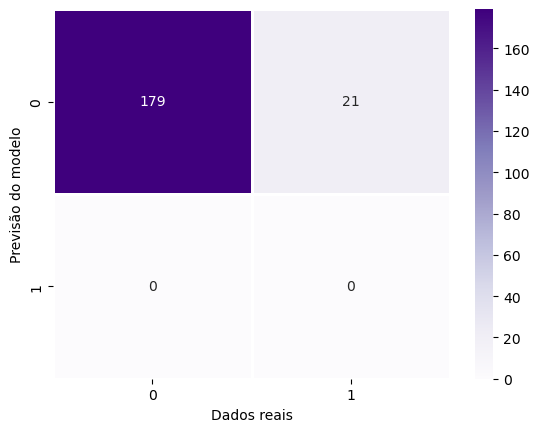

C:\Users\Felipe\AppData\Local\Temp\ipykernel_16780\4069885238.py:41: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  fidelity = ComputeUncompute(sampler = Sampler())



 Para QSVM com Z Feature Map e emaranhamento full

> Etapa 4: Criando e treinando o modelo ------------

> Etapa 5: Testando o modelo -----------------------
Desempenho geral: 
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       182
           1       0.29      0.33      0.31        18

    accuracy                           0.86       200
   macro avg       0.61      0.63      0.62       200
weighted avg       0.87      0.86      0.87       200

Matriz de confusão:


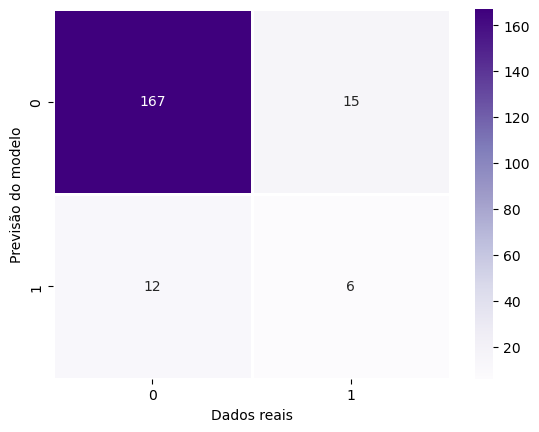


 Para QSVM com ZZ Feature Map e emaranhamento circular

> Etapa 4: Criando e treinando o modelo ------------


C:\Users\Felipe\AppData\Local\Temp\ipykernel_16780\4069885238.py:41: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  fidelity = ComputeUncompute(sampler = Sampler())



> Etapa 5: Testando o modelo -----------------------
Desempenho geral: 
              precision    recall  f1-score   support

           0       1.00      0.90      0.94       200
           1       0.00      0.00      0.00         0

    accuracy                           0.90       200
   macro avg       0.50      0.45      0.47       200
weighted avg       1.00      0.90      0.94       200

Matriz de confusão:


C:\Users\Felipe\AppData\Roaming\Python\conda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Felipe\AppData\Roaming\Python\conda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Felipe\AppData\Roaming\Python\conda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


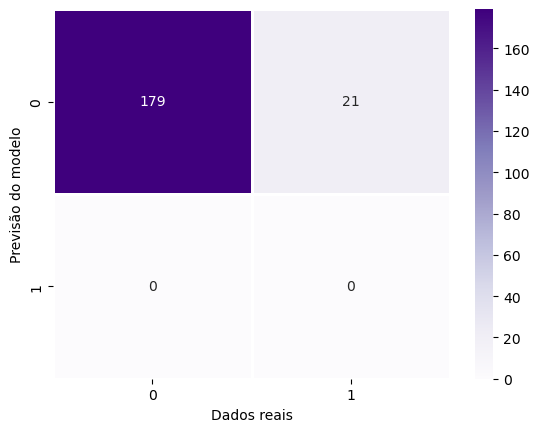

C:\Users\Felipe\AppData\Local\Temp\ipykernel_16780\4069885238.py:41: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  fidelity = ComputeUncompute(sampler = Sampler())



 Para QSVM com Pauli Feature Map e emaranhamento circular

> Etapa 4: Criando e treinando o modelo ------------

> Etapa 5: Testando o modelo -----------------------
Desempenho geral: 
              precision    recall  f1-score   support

           0       1.00      0.90      0.94       200
           1       0.00      0.00      0.00         0

    accuracy                           0.90       200
   macro avg       0.50      0.45      0.47       200
weighted avg       1.00      0.90      0.94       200

Matriz de confusão:


C:\Users\Felipe\AppData\Roaming\Python\conda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Felipe\AppData\Roaming\Python\conda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Felipe\AppData\Roaming\Python\conda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


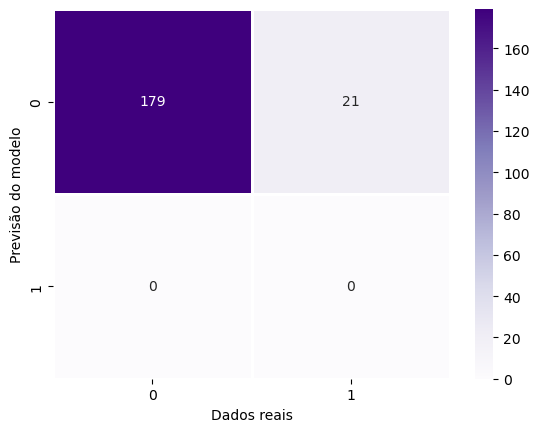


 Para QSVM com Z Feature Map e emaranhamento circular

> Etapa 4: Criando e treinando o modelo ------------


C:\Users\Felipe\AppData\Local\Temp\ipykernel_16780\4069885238.py:41: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  fidelity = ComputeUncompute(sampler = Sampler())



> Etapa 5: Testando o modelo -----------------------
Desempenho geral: 
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       182
           1       0.29      0.33      0.31        18

    accuracy                           0.86       200
   macro avg       0.61      0.63      0.62       200
weighted avg       0.87      0.86      0.87       200

Matriz de confusão:


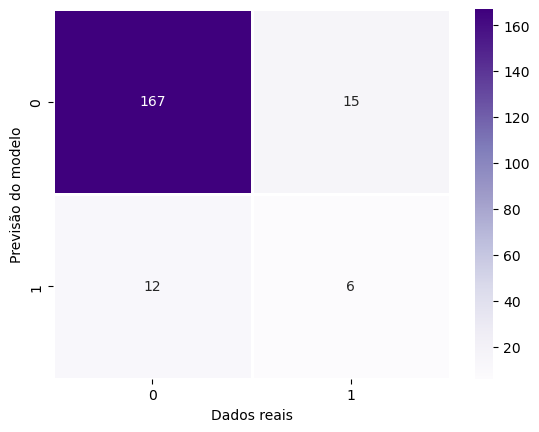

In [10]:
# Pré processamento
print('> Etapa 1: Preprocessamento ------------------------')
#df = df.iloc[:300]
X = df[['Profile_mean', 'Profile_stdev', 'Profile_skewness', 'Profile_kurtosis', 'DM_mean', 'DM_stdev', 'DM_skewness', 'DM_kurtosis']]
y = np.ravel(df['class'].values)
# Os dados já são valores numéricos então não há grandes modificações necessárias

# Separação dos dados
print('\n> Etapa 2: Separação dos dados ---------------------')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)  #treinamento com apenas 15% dos dados
print(f"X Treinamento: {X_train.shape}")
print(f"y Treinamento: {len(y_train)}")
print(f"X Teste:  {X_test.shape}")
print(f"y Teste:  {len(y_test)}")

# Normalização dos dados
print('\n> Etapa 3: Normalização ----------------------------')
scaler_x = StandardScaler()
scaler_x.fit(X_train)
Xs_train = scaler_x.transform(X_train)
Xs_test  = scaler_x.transform(X_test)

#backend = FakeBogotaV2()
#session = Session(backend=backend)

# Aplicação da QSVM
for entanglement in ["linear","full","circular"]:
    for f_map in ["ZZ", "Pauli","Z"]:
        print(f'\n Para QSVM com {f_map} Feature Map e emaranhamento {entanglement}')
        
        print('\n> Etapa 4: Criando e treinando o modelo ------------')
        if (f_map == "ZZ"):
            feature_map = ZZFeatureMap(feature_dimension=4, entanglement=entanglement, reps=1)
        elif (f_map=="Z"):
            feature_map = ZFeatureMap(feature_dimension=4, reps=1)
        elif(f_map=="Pauli"):
            feature_map = PauliFeatureMap(feature_dimension=4, entanglement=entanglement, reps=1)
        else:
            print("Executar dps")
            break
        fidelity = ComputeUncompute(sampler = Sampler())
        qkernel = FidelityQuantumKernel(feature_map = feature_map, fidelity = fidelity)
        QSVM = SVC(kernel=qkernel.evaluate, class_weight='balanced')
        QSVM.fit(Xs_train, y_train)
        print("\n Circuito")
        feature_Map.decompose().draw('mpl')
        
        # Testando o modelo
        print('\n> Etapa 5: Testando o modelo -----------------------')
        y_pred = QSVM.predict(Xs_test)
        desempenho = classification_report(y_pred, y_test)
        print(f'Desempenho geral: \n{desempenho}')
        print(f'Matriz de confusão:')
        cf_matrix = confusion_matrix(y_pred, y_test)
        sns.heatmap(cf_matrix, cmap='Purples', annot=True, linewidth=1, fmt='d')
        plt.xlabel("Dados reais")
        plt.ylabel("Previsão do modelo")
        plt.show()
        print("Feature map")
        PlotClasses(x_range, delta, Xs_test[:,0], Xs_test[:,1], y_pred)

## Referências
R. J. Lyon, B. W. Stappers, S. Cooper, J. M. Brooke, J. D. Knowles, Fifty Years of Pulsar Candidate Selection: From simple filters to a new principled real-time classification approach, Monthly Notices of the Royal Astronomical Society 459 (1), 1104-1123, DOI: 10.1093/mnras/stw656
SCHULD, Maria; PETRUCCIONE, Francesco. Machine learning with quantum computers. Berlin: Springer, 202

Lyon, R. (2015). HTRU2 [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5DK6R.